### Comparison with bulk immune cell ATAC-seq data
We obtained published data of FACS-sorted immune cell types (GSE118189), mapped reads to hg19 using bwa mem and removed duplicate reads. We merged replicate samples and performed peak calling for each cell type. Mapped reads from immune cell types and sub-types derived from snATAC-seq in this study and from the bulk immune cell ATAC-seq profiles were used to generate bedgraph files using bedtools. Read counts were normalized to CPM and bigwig files were generated using ENCODE ‘bedgraphToBigWig’. We created a bed file of the union of peak calls from snATAC-seq and bulk ATAC-seq using bedtools. We then compared bulk ATAC-seq cell type and snATAC-seq cell type normalized read count profiles within the union peak set using deeptools ‘multiBigWigSummary’. A heatmap of the clusters of Spearman rank correlation coefficients indicating similarity between bigwig files was generated using  the summary comparison from ‘multiBigWigSummary’. 

In [4]:
library(tidyr)
library(pheatmap)

In [1]:
setwd("/nfs/lab/projects/pbmc_snATAC/analysis_v2/peaks/")

In [2]:
cormat = read.table('multibigwigsummary-calderon.txt')

In [3]:
pbmcs = colnames(cormat)[grepl("PBMC",colnames(cormat) )]

In [5]:
calde = colnames(cormat)[!(grepl("PBMC",colnames(cormat)) )]

In [6]:
exclude = c('PBMC_b.bw', 'PBMC_mono.bw', 'PBMC_t.bw', 'PBMC_nk.bw','PBMC_cd4_t.bw',  'PBMC_cd8_t.bw')
#exclude = c('PBMC_cd4_t.bw',  'PBMC_cd8_t.bw')
pbmcs = pbmcs[!(pbmcs %in% exclude)]

In [7]:
cormat = cormat[pbmcs,calde]

In [8]:
best = t(cormat)==apply(cormat, 2, max)

In [9]:
bestp = cormat==apply(cormat, 1, max)

In [10]:
best2 = bestp+ t(best)

In [11]:
bestp[bestp==F]<-""
bestp[bestp==T]<-"*"

In [12]:
best2[best2==0]<-""
best2[best2==1]<-"*"
best2[best2==2]<-"**"

In [13]:
best[best==F]<-""
best[best==T]<-"*"

In [14]:
colnames (cormat) = gsub(".bw","",colnames (cormat) )
rownames (cormat) = gsub(".bw","",rownames (cormat) )

In [15]:
pheatmap(t(cormat), display_numbers = best, angle_col = 45, file = "../figures/heatmap.calderon.pdf")

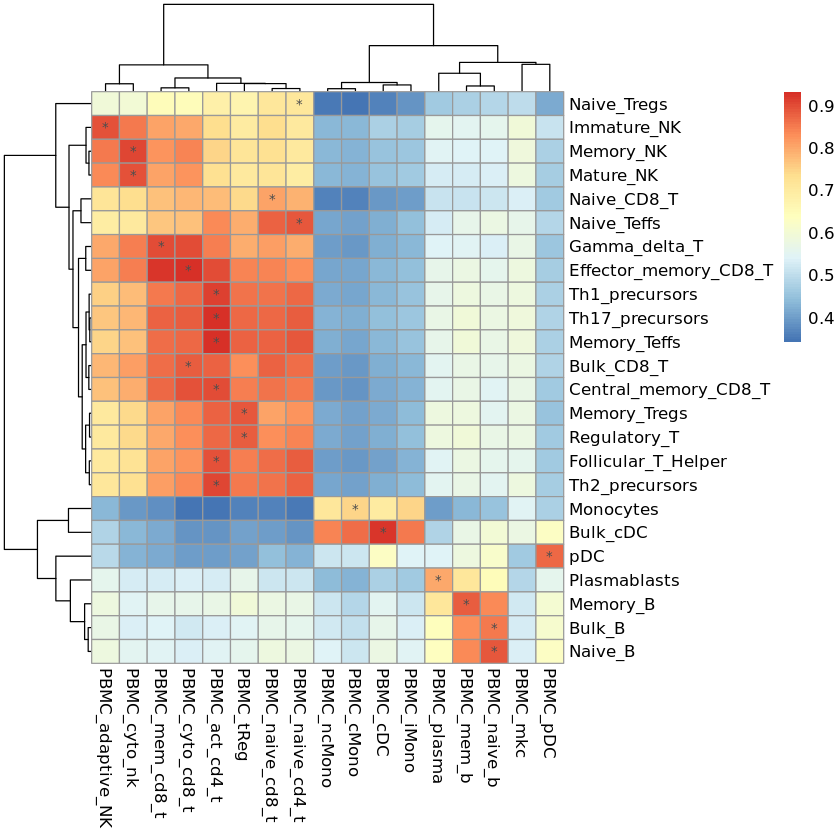

In [17]:
pheatmap(t(cormat), display_numbers = best)

### Comparison with scRNA-seq data
To verify the cell type and sub-type labels of clusters assigned using snATAC-seq, we compared genes with accessible chromatin profiles specific to each cluster to genes with cluster-specific expression from single cell RNA-seq data in PBMCs. For each of the 17 snATAC-seq clusters, we used the ‘rank_gene_groups’ function in scanpy (with the arguments ‘method = wilcoxon’ and ‘corr_method= benjamini-hochberg’) to identify cluster-specific windows of accessibility in each cluster with respect to all other clusters. For each cluster we then extracted a list of the top 100 z-score ranked promoter-annotated windows (aka genes) that had a minimum of 1.3 log fold change with respect to the other clusters. The same analysis was performed on a published scRNA dataset40 to identify the top 100 specific genes in the corresponding clusters. The intermediate monocyte cluster was excluded because it was not annotated in the scRNA dataset. Using a merged list of these cluster-specific genes (1,792 in total), we then performed Pearson correlation between gene expression and promoter accessibility z-scores in each pair of clusters.


In [21]:
rowOrderAll = c(
    'rna_t',
    'rna_cd4_t', 'rna_act_cd4_t',  'rna_naive_cd4_t', 'rna_tReg',
    'rna_cd8_t',  'rna_naive_cd8_t', 'rna_cyto_cd8_t', 'rna_mem_cd8_t', 
    'rna_mono', 'rna_cMono', 'rna_ncMono',   'rna_cDC', 
    'rna_nk', 'rna_adaptive_NK', 'rna_cyto_nk', 
    'rna_b', 'rna_mem_b', 'rna_naive_b', 'rna_plasma',
    'rna_mkc',
    'rna_pDC'
)

colOrderAll = c(
    'atac_t',
    'atac_cd4_t', 'atac_act_cd4_t',  'atac_naive_cd4_t', 'atac_tReg',
    'atac_cd8_t',  'atac_naive_cd8_t', 'atac_cyto_cd8_t', 'atac_mem_cd8_t', 
    'atac_mono', 'atac_cMono', 'atac_ncMono',   'atac_cDC', 
    'atac_nk', 'atac_adaptive_NK', 'atac_cyto_nk', 
    'atac_b', 'atac_mem_b', 'atac_naive_b', 'atac_plasma',
    'atac_mkc',
    'atac_pDC'
)

rowOrder_fine = c(
     'rna_act_cd4_t',  'rna_naive_cd4_t', 'rna_tReg',
     'rna_naive_cd8_t', 'rna_cyto_cd8_t', 'rna_mem_cd8_t', 
     'rna_cMono', 'rna_ncMono',   'rna_cDC', 
     'rna_adaptive_NK', 'rna_cyto_nk', 
    'rna_mem_b', 'rna_naive_b', 'rna_plasma', 'rna_mkc', 'rna_pDC' )

colOrder_fine = c(
     'atac_act_cd4_t',  'atac_naive_cd4_t', 'atac_tReg',
     'atac_naive_cd8_t', 'atac_cyto_cd8_t', 'atac_mem_cd8_t', 
     'atac_cMono', 'atac_ncMono',   'atac_cDC', 
     'atac_adaptive_NK', 'atac_cyto_nk', 
    'atac_mem_b', 'atac_naive_b', 'atac_plasma' , 'atac_mkc', 'atac_pDC')


rowOrder_broad = c('rna_t', 'rna_cd4_t', 'rna_cd8_t', 
                  'rna_mono', 'rna_nk', 
                  'rna_b', 'rna_mkc', 'rna_pDC')

colOrder_broad = c('atac_t', 'atac_cd4_t', 'atac_cd8_t', 
                  'atac_mono', 'atac_nk', 
                  'atac_b', 'atac_mkc', 'atac_pDC')

In [27]:
rnaTableDir_broad = '/nfs/lab/projects/pbmc_snATAC/pipeline/snATAC/cluster_analysis/ranked_gene_groups/rank_gene_groups_tables_scRNA/broad/'
rnaTableDir_fine = '/nfs/lab/projects/pbmc_snATAC/pipeline/snATAC/cluster_analysis/ranked_gene_groups/rank_gene_groups_tables_scRNA/fine/'
atacTableDir_broad = '/nfs/lab/projects/pbmc_snATAC/pipeline/snATAC/cluster_analysis/ranked_gene_groups/rank_gene_groups_tables/broad/'
atacTableDir_fine = '/nfs/lab/projects/pbmc_snATAC/pipeline/snATAC/cluster_analysis/ranked_gene_groups/rank_gene_groups_tables/fine/'

finecells = gsub("atac_","" ,colOrder_fine)

In [28]:
rnafiles  = c(paste0(rnaTableDir_fine,"/pbmc1-15.",finecells[1:14],".",finecells[1:14],'_side.ranked_gene_groups.txt'),
            paste0(rnaTableDir_broad,"/pbmc1-15.",finecells[15:16],".",finecells[15:16],'_side.ranked_gene_groups.txt'))
atacfiles = c(paste0(atacTableDir_fine,"/pbmc1-15.",finecells[1:14],".",finecells[1:14],'_side.ranked_gene_groups.txt'),
            paste0(atacTableDir_broad,"/pbmc1-15.",finecells[15:16],".",finecells[15:16],'_side.ranked_gene_groups.txt'))

In [24]:
geneinfo = read.table("/nfs/lab/publicdata/gencode_v19/gene_info.tsv", header=T)

In [25]:
geneinfo$gid= stringr::str_split_fixed(geneinfo$gene_id, "\\.",2)[,1]

In [29]:
rnatabs = data.frame()
for (i in 1:16){
rna = read.table(rnafiles[i], header=T)
rna$cell = finecells[i]
rna$gene = rownames(rna)    
rnatabs = rbind(rnatabs, rna)

}

In [30]:
rnatabs$gene_name = geneinfo$gene_name[match(rnatabs$gene,geneinfo$gid )]
rnatabs = rnatabs[!duplicated(rnatabs[,c('cell','gene_name')]),]


In [31]:
## prevent order change
rnatabs$cell =  factor(rnatabs$cell, levels = finecells)
rna_wide = spread(rnatabs[,c("gene_name",'cell','scores')], key =cell , value = scores)

In [32]:
atactabs = data.frame()
for (i in 1:16){
atac = read.table(atacfiles[i], header=T)
atac$cell = finecells[i]
atac$gene = rownames(atac)    
atactabs = rbind(atactabs, atac)

}

In [33]:
## prevent order change
atactabs$cell =  factor(atactabs$cell, levels = finecells)

In [34]:
atac_wide = spread(atactabs[,c("gene",'cell','scores')], key =cell , value = scores)

In [35]:
merged = merge(rna_wide, atac_wide, by=1)

In [36]:
rownames(merged)= merged[,1]
merged = merged[,-1]

In [37]:
colnames(merged)=c(rowOrder_fine ,colOrder_fine)

In [38]:
rnatabs_sub = subset(rnatabs, gene_name %in% rownames(merged))
spr = split(rnatabs_sub, rnatabs_sub$cell)

In [39]:
atactabs_sub = subset(atactabs, gene %in% rownames(merged))
spa = split(atactabs_sub, atactabs_sub$cell)

In [40]:
rnalist = sapply(spr, function(y) y$gene_name[order(-abs(y$scores))][1:150])
ataclist = sapply(spa, function(y) y$gene[order(-abs(y$scores))][1:150])
fullist = unique(c(c(rnalist), c(ataclist)))

In [41]:
length(fullist)

[1] 1885

In [42]:
rnalist = sapply(spr, function(y) y$gene_name[order(-(y$scores))][y$logfoldchanges>1.3][1:100])
ataclist = sapply(spa, function(y) y$gene[order(-(y$scores))][y$logfoldchanges>1.3][1:100])
fullist = na.omit(unique(c(c(rnalist), c(ataclist))))
length(fullist)

[1] 1792

In [43]:
m = merged[fullist,]

In [44]:
m = m[rowSums(m==0)<(ncol(m)-2),]
co = cor(m, method="pearson")[colOrder_fine, rowOrder_fine]

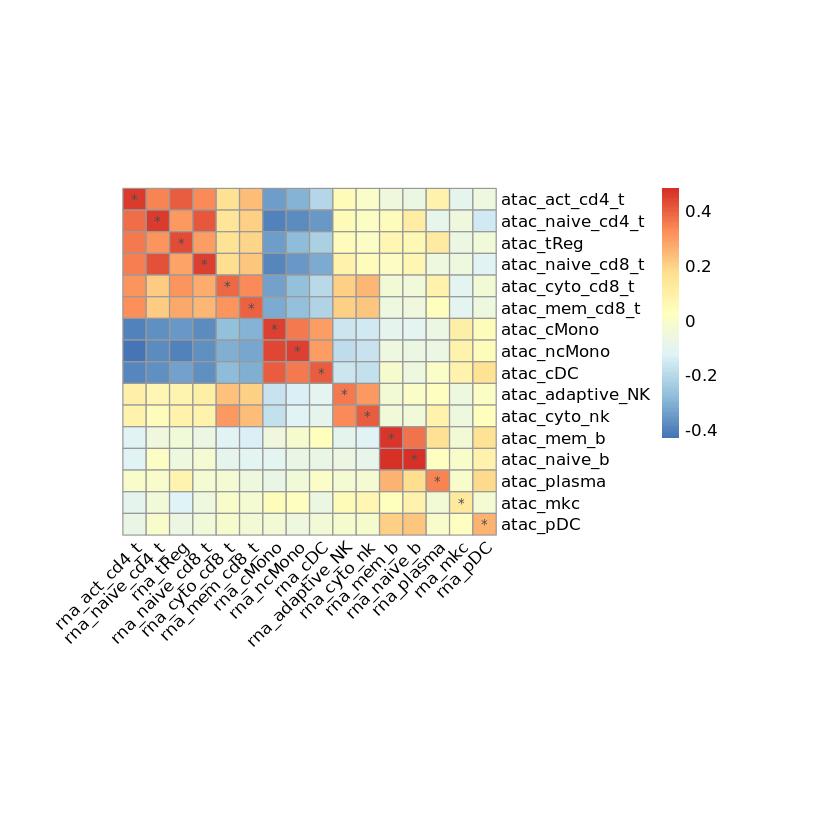

In [45]:
bb =  co == apply(co, 1, max)
bb[bb==F]<-""
bb[bb==T]<-"*"

pheatmap(co, cluster_rows = F, cluster_cols = F, angle_col = 45, display_numbers =bb,
 #        file = "../figures/heatmap.scrna.pdf",
         cellwidth = 14, cellheight=13)

### prop cells in specific promoters
To assess the effect of misclassified or residual doublet nuclei in each cluster on caQTL mapping, we first determined the proportion of nuclei with at least one cell with promoter accessibility for several highly cell type-specific genes in each of the major cell types (B-cells, T-cells, NK-cells, Monocytes).  For each cell type, we removed nuclei with accessibility at the promoter of genes specific to different cell types (B cells n=150, T cells n=1,213, NK cells=299, Monocytes n=2,007), and repeated caQTL mapping using the remaining nuclei.  We compared results by determining the correlation in effect sizes and concordance in direction of effect for caQTLs.  

In [412]:
setwd()

[1] "/nfs/lab/projects/pbmc_snATAC/analysis_v2/peaks"

In [4]:
barcode_list = read.table('pbmc1-15_clusterLabels.txt',   sep="\t",header=T)

In [5]:
table(barcode_list$broad_populations_2)


     b    mkc   mono     nk    pDC plasma      t 
  7324   1120  30976   9467    380    167  46568 

In [6]:
colors =  matrix( c('orange2', 'b','magenta4', "t", 'tan4','nk','#7FC97F','mono', "#BC80BD","mkc",
                                    "#B3B3B3","pDC","gold","plasma"), ncol=2, byrow=T)

In [7]:
colors = colors[1:4,]

In [8]:
alltags = data.frame()
for (cl in colors[,2]){
    tag = read.table(paste("../promSpec/Intersected",cl, "3.tagalign", sep=".")) 
    tag$cell = cl
    alltags = rbind(alltags, tag)
    tag = read.table(paste("../promSpec/Intersected",cl, "2.tagalign", sep=".")) 
    tag$cell = cl
    alltags = rbind(alltags, tag)
    tag = read.table(paste("../promSpec/Intersected",cl, "tagalign", sep=".")) 
    tag = tag[,-11]
    tag$cell = cl
    alltags = rbind(alltags, tag)
    
}

In [9]:
alltags = subset(alltags , V4 %in% barcode_list$X)

In [10]:
dim(alltags)

[1] 119445     11

In [11]:
alltags$peak = paste(alltags$V7, alltags$V8, alltags$V9, sep="_")

In [12]:
## 1 read per barcode per peak
alltags = subset(alltags , !duplicated(alltags[,c("peak", "V4", "cell")]))

In [13]:
head(alltags)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,cell,peak
,<chr>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
1,chr11,118213112,118213312,pbmc12_TAGCCCTGTGCTGAAG,60,+,chr11,118213236,118213664,CD3D,b,chr11_118213236_118213664
2,chr11,118213132,118213332,pbmc15_CATGCCTCACTCGCAG,60,-,chr11,118213236,118213664,CD3D,b,chr11_118213236_118213664
3,chr11,118213183,118213383,pbmc9_CACAGATCACGCGACT,60,+,chr11,118213236,118213664,CD3D,b,chr11_118213236_118213664
5,chr11,118213248,118213448,pbmc9_GTGGCGTTCAAACCAC,60,+,chr11,118213236,118213664,CD3D,b,chr11_118213236_118213664
6,chr11,118213261,118213461,pbmc1_GTGACATGTTGGCTAT,60,+,chr11,118213236,118213664,CD3D,b,chr11_118213236_118213664
7,chr11,118213275,118213475,pbmc13_CTGTTCGCAGAGATGC,60,+,chr11,118213236,118213664,CD3D,b,chr11_118213236_118213664


In [14]:
dim(alltags)

[1] 53061    12

In [15]:
cellnumb = table(alltags$peak, alltags$cell)

In [16]:
allcells =table(barcode_list$broad_populations_2)

In [17]:
allcells = allcells[c(1,3,4,7)]

In [18]:
allcells


    b  mono    nk     t 
 7324 30976  9467 46568 

In [19]:
cellnumb

                           
                               b mono   nk    t
  chr11_118213236_118213664   14   72   90 4724
  chr11_60222824_60223601   2385   69   69  353
  chr16_12058616_12059136    179   20   11   52
  chr16_31438683_31439443     45  508  517  815
  chr19_55417019_55417794     25 1071 2601  534
  chr2_112677699_112678155     6 1129    7   31
  chr2_113593752_113594677    88 7460   25  123
  chr2_204732240_204732789    13   69   87 3013
  chr2_204733980_204734890    19  251  121 4602
  chr2_204798654_204800098     7   59   73 2641
  chr2_204801217_204801861     8   42  115 3865
  chr3_108541016_108541720     7   17   52 1567
  chr3_108553386_108554456    19   45   86 5899
  chr6_31897101_31897981       8 1074   18   95
  chr6_70590534_70590782     227   91    3   42
  chr6_70591220_70592078    1667  762   17  106
  chr6_70596942_70597790     279   53   11   66
  chr8_40755032_40755658       4   17  235   35
  chr9_140061845_140062076    10   36   13   66
  chr9_91605

In [20]:
dim(cellnumb)

[1] 21  4

In [21]:
cellprop = t(t(cellnumb)/c(allcells))

In [586]:
selection = c(1,5,15,11)

In [638]:
selection = 1:21

In [22]:
selection = c(8,1,18,5,2,16, 14,7)

In [23]:
toplot = cellprop[selection,colors[,2]]

In [648]:
labs = toplot/apply(toplot,1,max)

In [645]:
# options(repr.plot.width=12, repr.plot.height=8)

# par(mfrow=c(3,7))
# #genes = c("MS4A1", "CTLA4", "ZMAT4", "C2")
# for (y in 1:21){

# bp <- barplot(toplot[y,], col = colors[,1], border=NA, las=0, main = rownames(toplot)[y], ylab = "prop. cells with accessible promoter",
#               ylim=c(0, max(toplot[y,])+(max(toplot[y,])/10)))
# text(x=bp, y= toplot[y,], labels = paste0(round(labs[y,],3)*100, "%"), pos = 3)
#     }

In [667]:
#options(repr.plot.width=12, repr.plot.height=8)
pdf("../figures/Barplots_cellContam.pdf", height = 5)
par(mfcol=c(2,4), mar = c(3,4,3,0.5))
genes = c( "CTLA4", "CD3D","ZMAT4", "NCR1", "MS4A1", "COL19A1", "C2","IL1B")
for (y in 1:8){

bp <- barplot(toplot[y,], col = colors[,1], border=NA, las=2, main = genes[y], ylab = "prop. cells with accessible promoter",
              ylim=c(0, max(toplot[y,])+(max(toplot[y,])/10)), cex.axis=0.85, cex.lab=0.85)
text(x=bp, y= toplot[y,], labels = paste0(round(labs[y,],3)*100, "%"), pos = 3, cex=0.85)
    
}
dev.off()

png 
  2

In [27]:
subtag = subset(alltags, peak %in%  rownames(toplot))

In [35]:
namevec = setNames(nm = c( "CTLA4", "CD3D","ZMAT4", "NCR1", "MS4A1", "COL19A1", "C2","IL1B"),
                   object = rep(c('t', 'nk', 'b', 'mono'), each=2))

In [36]:
subtag$correct_celltype = namevec[subtag$V10]

In [40]:
table(subtag$correct_celltype, subtag$cell)

      
          b mono   nk    t
  b    4052  831   86  459
  mono   96 8534   43  218
  nk     29 1088 2836  569
  t      27  141  177 7737

In [45]:
for(cl in colors[,2] ){
    
    badcells = subset(subtag, cell == cl & correct_celltype!=cl)
    writeLines(unique(badcells$V4), paste0(cl, ".badcells.txt"))
    cat(cl, " ", length(unique(badcells$V4)), "\n")
}

b   150 
t   1213 
nk   299 
mono   2007 


In [44]:
allcells


    b  mono    nk     t 
 7324 30976  9467 46568 

In [46]:
150/7324

[1] 0.02048061

In [47]:
1213/46568

[1] 0.02604793

In [48]:
299/9467

[1] 0.03158339

In [49]:
2007/30976

[1] 0.0647921

In [670]:
ll = labs[c(2,3,5,8),]
ll[ll==1]<-NA

In [675]:
mean(colMeans(ll, na.rm = T))

[1] 0.02784862

In [543]:
normcells = t(t(cellnumb*10000)/c(allcells))

In [553]:
bests = c(10,11,3,4,8,9,1)

In [556]:
bests=

In [560]:
bests=c(6,1,2:5,7)

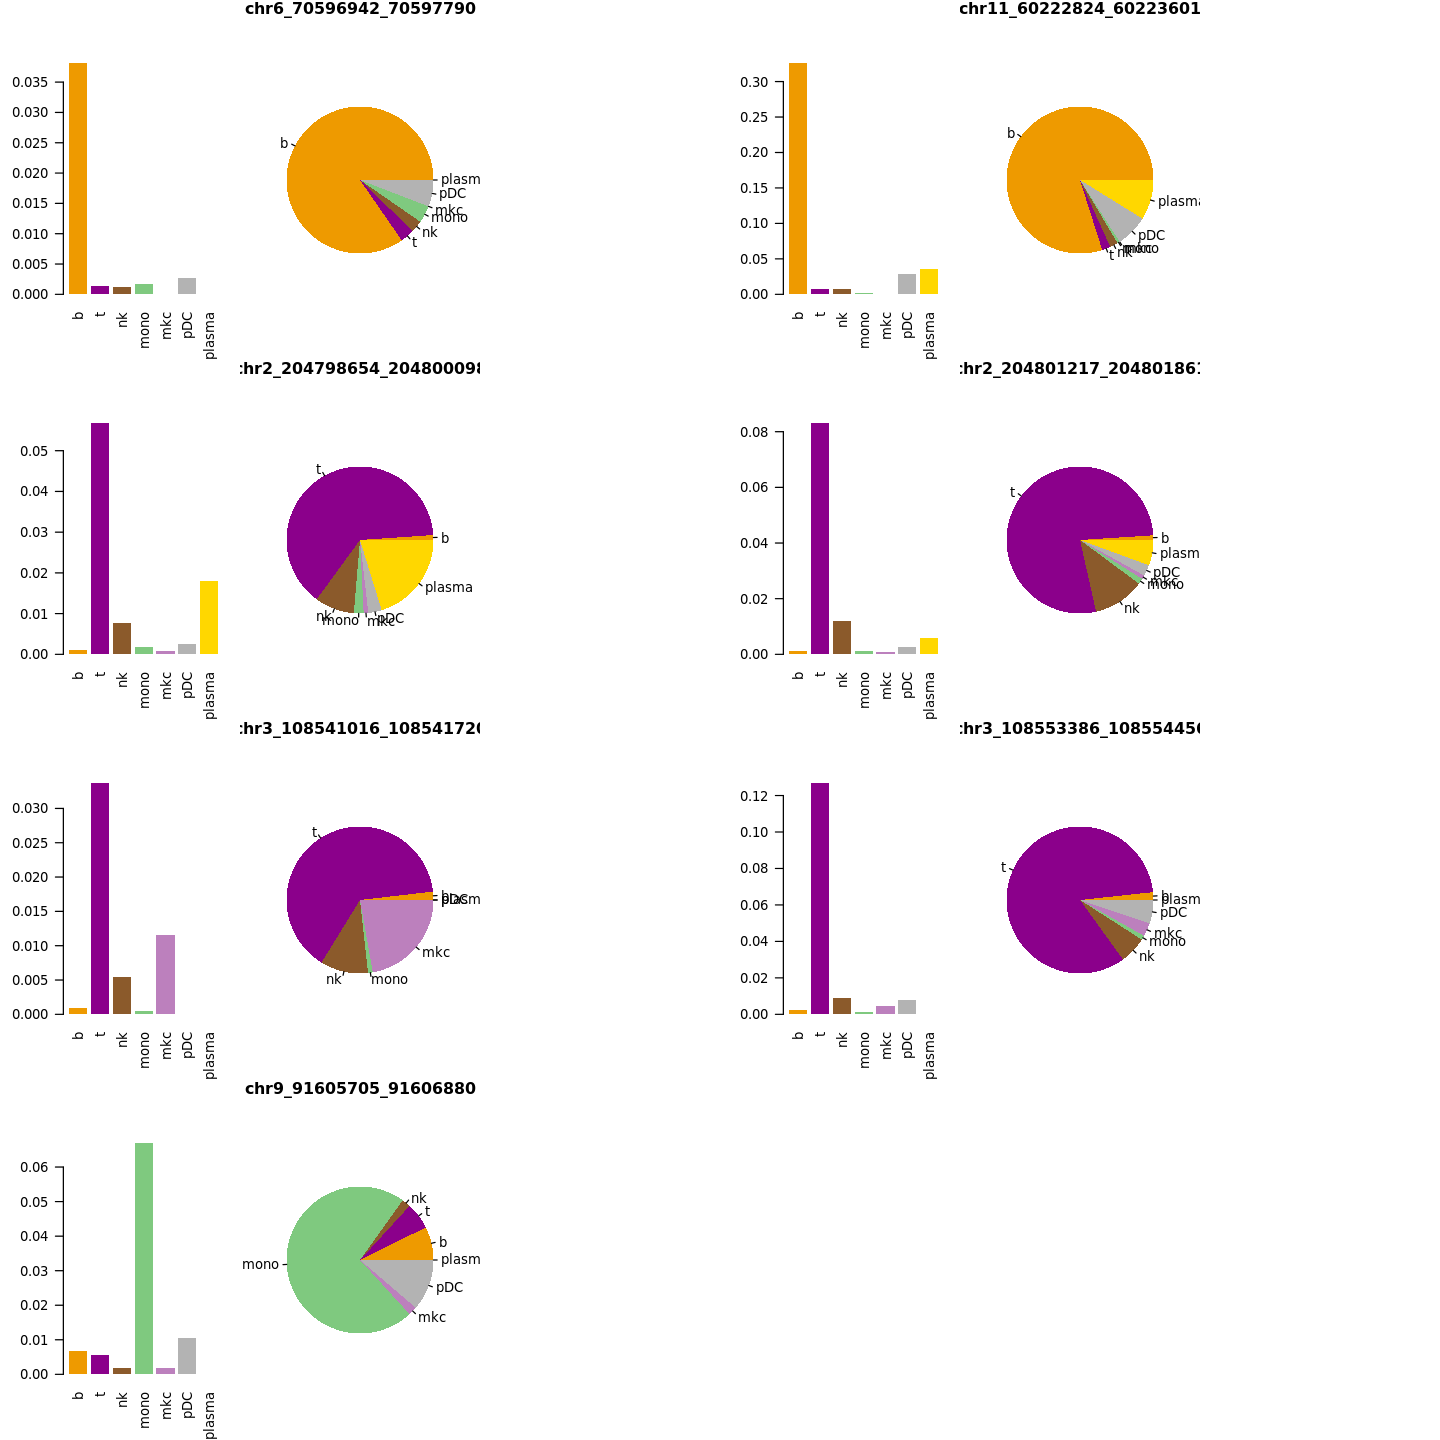

In [561]:
options(repr.plot.width=12, repr.plot.height=12)
par(mfrow=c(4,6))

for (y in bests){
par(mar=c(4,4,4,1))
    barplot(cellprop[y,colors[,2]], col = colors[,1], border=NA, las=2)
    par(mar=c(1,1,1,1))
    pie(normcells[y,colors[,2]], col = colors[,1], border=NA, main = rownames(cellprop)[y])
    plot.new()
    }

In [677]:
examples = setNames(sample(1:100,10), letters[1:10])